In [1]:
%matplotlib inline
%pip install seaborn --upgrade
%pip install -q transformers

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import scipy.stats as st

In [3]:
#https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

### Diabet Prediction

#### Context

Diabetes is among the most prevalent chronic diseases. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly 327 billion dollars and total costs with undiagnosed diabetes and prediabetes approaching 400 billion dollars annually.
Content

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

This dataset contains 3 files:

    diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables
    diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.
    diabetes _ binary _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

Explore some of the following research questions:

    Can survey questions from the BRFSS provide accurate predictions of whether an individual has diabetes?
    What risk factors are most predictive of diabetes risk?
    Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?
    Can we create a short form of questions from the BRFSS using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes?


##### Columns information: 
1. Diabetes_012: 0 = no diabetes 1 = prediabetes 2 = diabetes
2. HighBP: 0 = no high BP 1 = high BP
3. HighChol: 0 = no high cholesterol 1 = high cholesterol
4. CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
5. BMI: Body Mass Index
6. Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
7. Stroke: (Ever told) you had a stroke. 0 = no 1 = yes
8. HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
9. PhysActivity: Physical activity in past 30 days - not including job 0 = no 1 = yes
10. Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes 
11. Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes
12. HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes
13. AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
14. NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
15. GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
16. MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days 
17. PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
18. DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
19. Sex: 0 = female 1 = male
20. Age: 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older 
21. Education: Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
22. Income: Income scale (INCOME2 see codebook) scale 1-8 1 = less than 10,000 USD 5 = less than 35,000 USD 8 = 75,000 USD or more 

In [4]:
diabets_health_indicators = pd.read_csv("diabetes_012_health_indicators_BRFSS2021.csv")
diabets_health_indicators.describe().T

count       mean       std   min   25%   50%   75%  \
Diabetes_012          236378.0   0.307791  0.705037   0.0   0.0   0.0   0.0   
HighBP                236378.0   0.418558  0.493324   0.0   0.0   0.0   1.0   
HighChol              236378.0   0.402059  0.490315   0.0   0.0   0.0   1.0   
CholCheck             236378.0   0.963347  0.187909   0.0   1.0   1.0   1.0   
BMI                   236378.0  28.953579  6.552055  12.0  24.0  28.0  32.0   
Smoker                236378.0   0.411997  0.492196   0.0   0.0   0.0   1.0   
Stroke                236378.0   0.038900  0.193356   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  236378.0   0.086548  0.281172   0.0   0.0   0.0   0.0   
PhysActivity          236378.0   0.779231  0.414766   0.0   1.0   1.0   1.0   
Fruits                236378.0   0.621259  0.485074   0.0   0.0   1.0   1.0   
Veggies               236378.0   0.827767  0.377583   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     236378.0   0.062083  0.241306   0.0   0.0   0.0   0.0   
AnyHealthcare         236378.0   0.962573  0.189807   0.0   1.0   1.0   1.0   
NoDocbcCost           236378.0   0.063737  0.244284   0.0   0.0   0.0   0.0   
GenHlth               236378.0   2.480717  1.029134   1.0   2.0   2.0   3.0   
MentHlth              236378.0   3.937710  7.886506   0.0   0.0   0.0   4.0   
PhysHlth              236378.0   3.751297  8.245907   0.0   0.0   0.0   2.0   
DiffWalk              236378.0   0.153948  0.360900   0.0   0.0   0.0   0.0   
Sex                   236378.0   0.477824  0.499509   0.0   0.0   0.0   1.0   
Age                   236378.0   7.863930  3.236997   1.0   5.0   8.0  10.0   
Education             236378.0   5.139099  0.946185   1.0   4.0   5.0   6.0   
Income                236378.0   6.927451  2.375450   1.0   5.0   7.0   9.0   

                       max  
Diabetes_012           2.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   99.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                11.0

In [5]:
#First column name is not clear. I will edit manually
diabets_health_indicators.rename(columns = {'Diabetes_012': 'diabetes_status'}, inplace=True)

In [6]:
diabets_health_indicators.columns

Index(['diabetes_status', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
diabets_health_indicators.columns = diabets_health_indicators.columns.to_series().apply(lambda col_name: re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', col_name)).str.lower().str.replace(" ","_")

In [8]:
diabets_health_indicators.isna().any(axis=None)

False

In [9]:
diabets_health_indicators.columns

Index(['diabetes_status', 'high_bp', 'high_chol', 'chol_check', 'bmi',
       'smoker', 'stroke', 'heart_diseaseor_attack', 'phys_activity', 'fruits',
       'veggies', 'hvy_alcohol_consump', 'any_healthcare', 'no_docbc_cost',
       'gen_hlth', 'ment_hlth', 'phys_hlth', 'diff_walk', 'sex', 'age',
       'education', 'income'],
      dtype='object')

In [10]:
diabets_health_indicators.head(5)

diabetes_status  high_bp  high_chol  chol_check   bmi  smoker  stroke  \
0              0.0        0        1.0           1  15.0     1.0     0.0   
1              2.0        1        0.0           1  28.0     0.0     0.0   
2              2.0        1        1.0           1  33.0     0.0     0.0   
3              2.0        0        1.0           1  29.0     0.0     1.0   
4              0.0        0        0.0           1  24.0     1.0     0.0   

   heart_diseaseor_attack  phys_activity  fruits  ...  any_healthcare  \
0                     0.0              0       1  ...               1   
1                     1.0              0       1  ...               1   
2                     0.0              1       1  ...               1   
3                     1.0              1       1  ...               1   
4                     0.0              0       0  ...               1   

   no_docbc_cost  gen_hlth  ment_hlth  phys_hlth  diff_walk  sex  age  \
0            0.0       5.0       10.0       20.0        0.0    0   11   
1            0.0       2.0        0.0        0.0        0.0    0   11   
2            0.0       2.0       10.0        0.0        0.0    0    9   
3            0.0       5.0        0.0       30.0        1.0    1   12   
4            0.0       3.0        0.0        0.0        1.0    1   13   

   education  income  
0        4.0     5.0  
1        4.0     3.0  
2        4.0     7.0  
3        3.0     4.0  
4        5.0     6.0  

[5 rows x 22 columns]

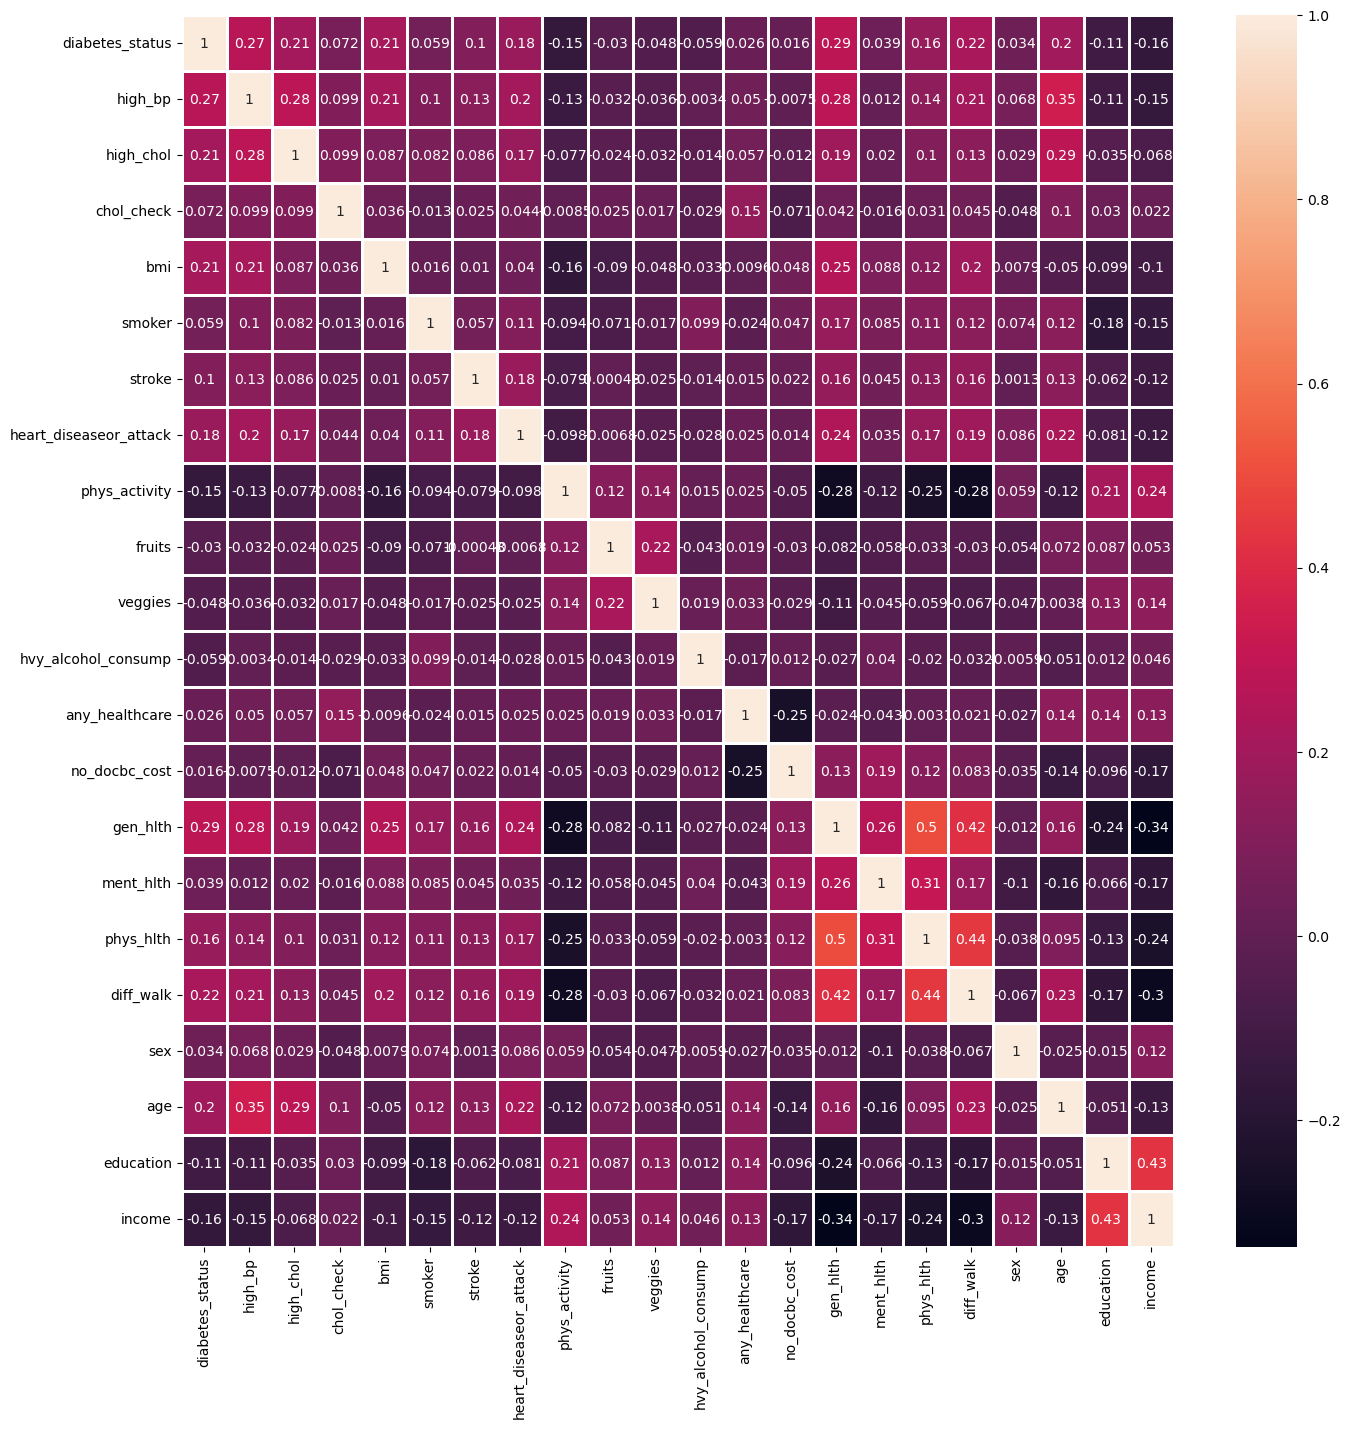

In [11]:
fig, ax = plt.subplots(figsize= (16,16))
sns.heatmap(diabets_health_indicators.corr(),annot = True, ax=ax,linewidths= 1 )
plt.show()

In [12]:
diabets_health_indicators['diabetes_status'].astype('category')

0         0.0
1         2.0
2         2.0
3         2.0
4         0.0
         ... 
236373    2.0
236374    0.0
236375    0.0
236376    0.0
236377    0.0
Name: diabetes_status, Length: 236378, dtype: category
Categories (3, float64): [0.0, 1.0, 2.0]

In [13]:
diabets_health_indicators["sex"] = diabets_health_indicators["sex"].astype("string")

In [14]:
diabets_health_indicators["sex"]

0         0
1         0
2         0
3         1
4         1
         ..
236373    1
236374    0
236375    1
236376    1
236377    0
Name: sex, Length: 236378, dtype: string

In [15]:
diabets_health_indicators.loc[diabets_health_indicators["sex"] == '0' , 'sex'] = "f"

In [16]:
diabets_health_indicators.loc[diabets_health_indicators["sex"] == '1', 'sex'] = "m"

In [17]:
diabets_prediabetes = diabets_health_indicators[diabets_health_indicators.diabetes_status == 2]

In [18]:
diabets_positive = diabets_health_indicators[diabets_health_indicators.diabetes_status == 1]

In [19]:
diabetes_negative = diabets_health_indicators[diabets_health_indicators.diabetes_status == 0]

In [20]:
diabets_positive.bmi.mean(),diabets_prediabetes.bmi.mean(), diabetes_negative.bmi.mean()

(31.477309129738387, 32.187172306959006, 28.331206799498965)

In [21]:
diabets_positive.high_bp.mean(), diabets_prediabetes.high_bp.mean(), diabetes_negative.high_bp.mean()

(0.5839117280654921, 0.734240943755958, 0.36010771282665033)

In [22]:
diabets_positive.high_chol.mean(), diabets_prediabetes.high_chol.mean(), diabetes_negative.high_chol.mean()

(0.5812422139170671, 0.6395376549094376, 0.35652742772236057)

In [23]:
diabets_positive.fruits.mean(),diabets_prediabetes.fruits.mean(), diabetes_negative.fruits.mean()

(0.591386367681082, 0.5870471877979028, 0.6279343377740363)

In [24]:
diabets_positive.veggies.mean(),diabets_prediabetes.veggies.mean(), diabetes_negative.veggies.mean()

(0.802455953016551, 0.7850333651096282, 0.8357632954850881)

In [25]:
positive_bmi_set = diabets_positive.groupby('bmi').bmi.value_counts()

In [26]:
positive_bmi_set

bmi
12.0      1
14.0      1
15.0      2
16.0      4
17.0      7
18.0     17
19.0     36
20.0     62
21.0     89
22.0    149
23.0    171
24.0    250
25.0    267
26.0    317
27.0    451
28.0    323
29.0    341
30.0    389
31.0    352
32.0    347
33.0    293
34.0    238
35.0    189
36.0    162
37.0    180
38.0    158
39.0    131
40.0    111
41.0     97
42.0     59
43.0     74
44.0     53
45.0     43
46.0     35
47.0     36
48.0     22
49.0     23
50.0     23
51.0     17
52.0     13
53.0     10
54.0      5
55.0      9
56.0     12
57.0      7
58.0      4
59.0      6
60.0      9
61.0      3
62.0      7
64.0      3
65.0      2
66.0      1
70.0      1
73.0      2
74.0      1
75.0      2
79.0      1
90.0      1
Name: count, dtype: int64

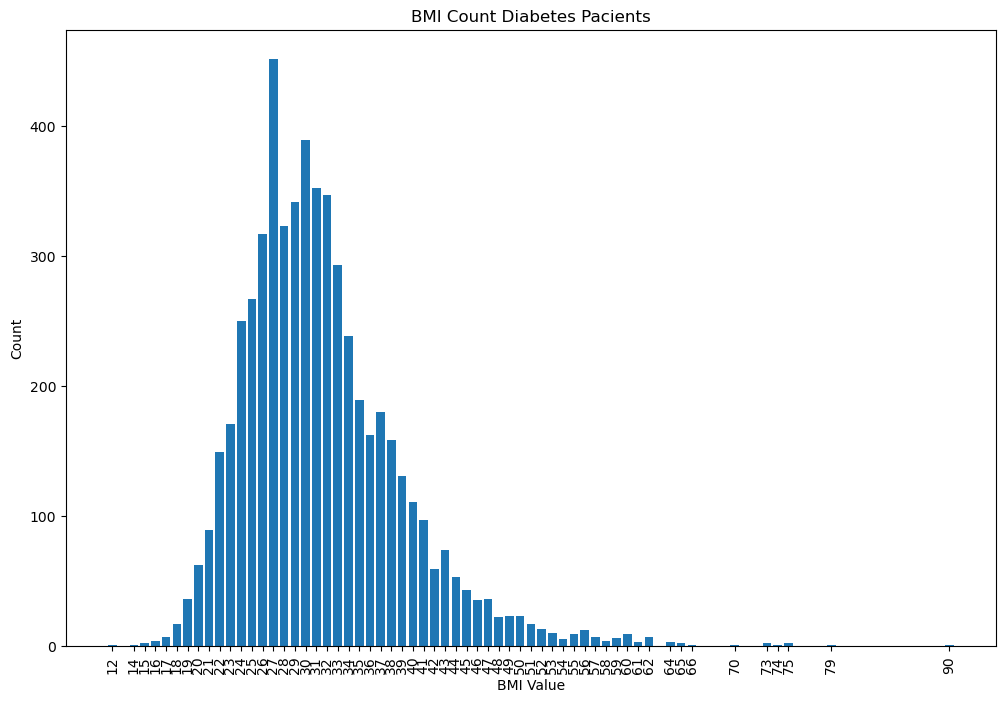

In [27]:
plt.figure(figsize = (12,8))
plt.bar(positive_bmi_set.index, positive_bmi_set, align= 'center')

plt.xticks(positive_bmi_set.index,rotation=90)

plt.xlabel("BMI Value")
plt.ylabel("Count")

plt.title("BMI Count Diabetes Pacients")
plt.show()

#### BMI, High blood preasure and cholesterole are the main factors which shows if the person has risk from diabetes. We can see that fruits and veggies has no relation with this disease. As we can see, there are some outlier values.

In [28]:
positive_bmi_set.mean()

95.23728813559322

In [29]:
positive_bmi_set[positive_bmi_set > 90].sort_values(ascending = False)

bmi
27.0    451
30.0    389
31.0    352
32.0    347
29.0    341
28.0    323
26.0    317
33.0    293
25.0    267
24.0    250
34.0    238
35.0    189
37.0    180
23.0    171
36.0    162
38.0    158
22.0    149
39.0    131
40.0    111
41.0     97
Name: count, dtype: int64

In [30]:
prediabetes_bmi_set = diabets_prediabetes.groupby('bmi').bmi.value_counts()

In [31]:
prediabetes_bmi_set

bmi
13.0     3
14.0     7
15.0     9
16.0    30
17.0    49
        ..
86.0     1
87.0     3
91.0     1
94.0     1
99.0     2
Name: count, Length: 76, dtype: int64

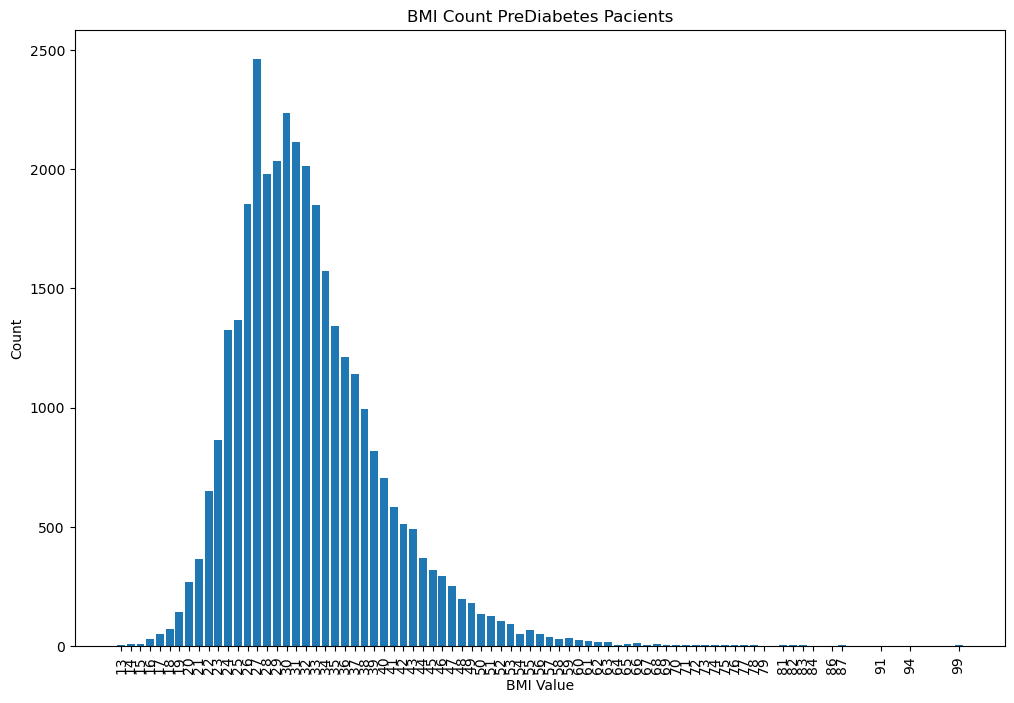

In [32]:
plt.figure(figsize = (12,8))
plt.bar(prediabetes_bmi_set.index, prediabetes_bmi_set, align= 'center')

plt.xticks(prediabetes_bmi_set.index,rotation=90)

plt.xlabel("BMI Value")
plt.ylabel("Count")

plt.title("BMI Count PreDiabetes Pacients")
plt.show()

In [33]:
prediabetes_bmi_set.mean()

441.6842105263158

In [34]:
prediabetes_bmi_set[prediabetes_bmi_set > 400].sort_values(ascending = False)

bmi
27.0    2461
30.0    2236
31.0    2116
29.0    2035
32.0    2012
28.0    1980
26.0    1855
33.0    1849
34.0    1575
25.0    1368
35.0    1344
24.0    1326
36.0    1214
37.0    1141
38.0     995
23.0     865
39.0     816
40.0     704
22.0     648
41.0     585
42.0     510
43.0     492
Name: count, dtype: int64

In [35]:
negative_bmi_set = diabetes_negative.groupby('bmi').bmi.value_counts()

In [36]:
negative_bmi_set

bmi
12.0      8
13.0     24
14.0     55
15.0     99
16.0    297
       ... 
89.0      1
92.0      1
94.0      1
95.0      1
98.0      3
Name: count, Length: 81, dtype: int64

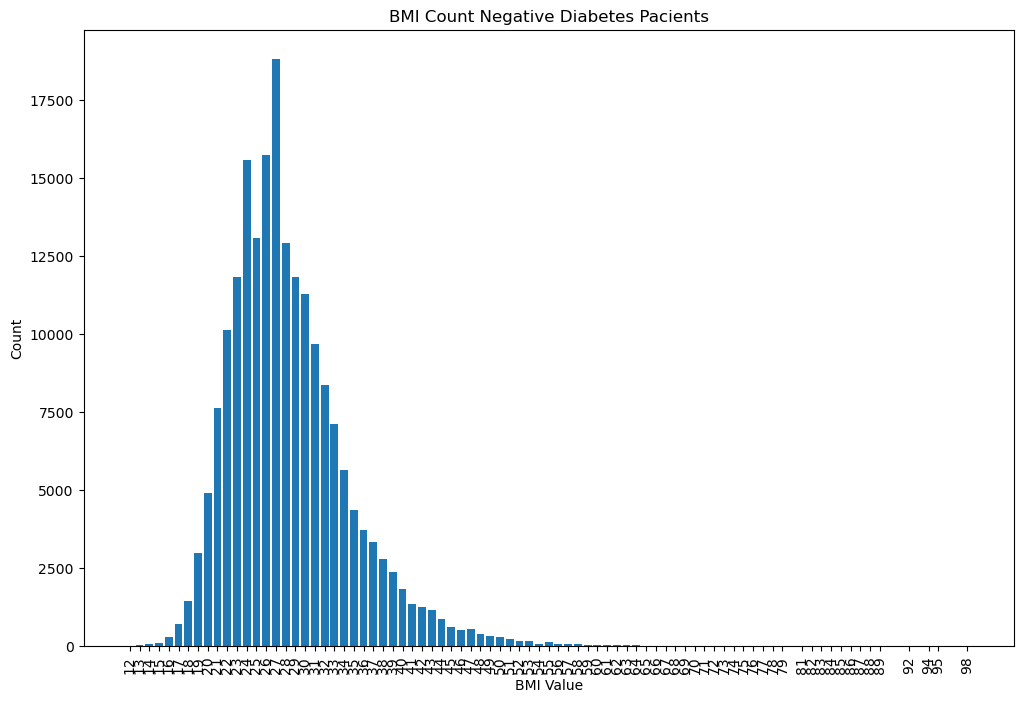

In [37]:
plt.figure(figsize = (12,8))
plt.bar(negative_bmi_set.index, negative_bmi_set, align= 'center')

plt.xticks(negative_bmi_set.index,rotation=90)

plt.xlabel("BMI Value")
plt.ylabel("Count")

plt.title("BMI Count Negative Diabetes Pacients")
plt.show()

In [38]:
negative_bmi_set.mean()

2434.456790123457

In [39]:
negative_bmi_set[negative_bmi_set > 2400].sort_values(ascending = False)

bmi
27.0    18821
26.0    15758
24.0    15599
25.0    13087
28.0    12922
29.0    11838
23.0    11836
30.0    11307
22.0    10136
31.0     9678
32.0     8388
21.0     7633
33.0     7112
34.0     5647
20.0     4902
35.0     4378
36.0     3721
37.0     3336
19.0     2992
38.0     2792
Name: count, dtype: int64

In [40]:
#negative_bmi_set.apply(lambda x: (x - negative_bmi_set.min()) / (negative_bmi_set.max() - negative_bmi_set.min())).mean() # normalize

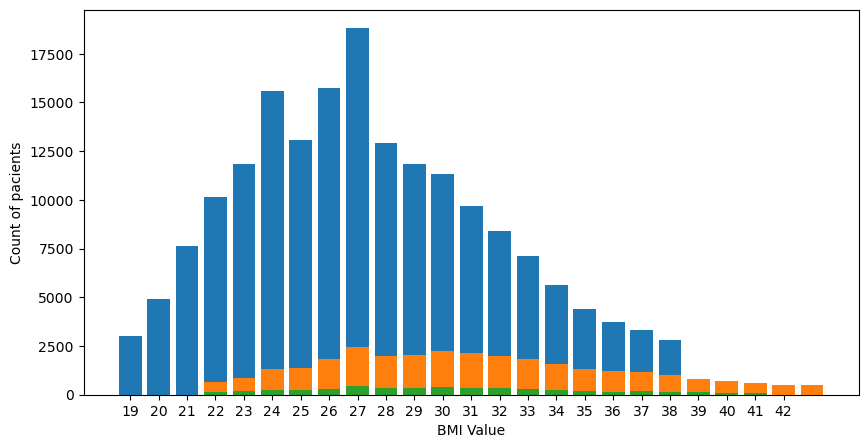

In [41]:
plt.figure(figsize = (10,5))

plt.bar(negative_bmi_set[negative_bmi_set > 2400].index,negative_bmi_set[negative_bmi_set > 2400])
plt.bar(prediabetes_bmi_set[prediabetes_bmi_set > 400].index,prediabetes_bmi_set[prediabetes_bmi_set > 400])
plt.bar(positive_bmi_set[positive_bmi_set > 90].index,positive_bmi_set[positive_bmi_set > 90])

plt.xticks(range(negative_bmi_set[negative_bmi_set > 2400].index.min().astype(int), prediabetes_bmi_set[prediabetes_bmi_set > 400].index.max().astype(int)))

plt.xlabel("BMI Value")
plt.ylabel("Count of pacients")

plt.show()

##### As we can see, risk increase with BMI. Pacients with BMI less than 22 has no risk for Diabetes diagnose at all and pacients with BMI over 38 are defenately risk group.

In [42]:
st.ttest_ind(negative_bmi_set[negative_bmi_set > 2400], prediabetes_bmi_set[prediabetes_bmi_set > 400], equal_var = False)

TtestResult(statistic=7.201681873558208, pvalue=6.428414209100185e-07, df=19.588583909670465)

In [43]:
st.ttest_ind(negative_bmi_set[negative_bmi_set > 2400], positive_bmi_set[positive_bmi_set > 90], equal_var = False)

TtestResult(statistic=8.31090852164473, pvalue=9.404509893307583e-08, df=19.01745153989746)

In [44]:
st.ttest_ind(prediabetes_bmi_set[prediabetes_bmi_set > 400], positive_bmi_set[positive_bmi_set > 90], equal_var = False)

TtestResult(statistic=8.360911467860932, pvalue=2.5866280230412633e-08, df=22.24279585403375)

In [45]:
bmi_grouped = [value.tolist() for (key,value) in diabets_health_indicators.groupby('diabetes_status').bmi]

In [46]:
st.f_oneway(*bmi_grouped)

F_onewayResult(statistic=5652.393984789744, pvalue=0.0)

In [47]:
# refuse Ho (отхвърляме нулевата хипотеза, че разликата между категориите е > разликите в категориите)

In [48]:
grouped_high_bp = diabets_health_indicators.groupby('diabetes_status').high_bp.value_counts().reset_index()

In [49]:
count_total = grouped_high_bp.groupby('diabetes_status')['count'].transform('sum')

In [50]:
count_total

0    197191
1    197191
2      5619
3      5619
4     33568
5     33568
Name: count, dtype: int64

In [51]:
grouped_high_bp['precent_by_group'] = grouped_high_bp['count'] / count_total *100

In [52]:
grouped_high_bp

diabetes_status  high_bp   count  precent_by_group
0              0.0        0  126181         63.989229
1              0.0        1   71010         36.010771
2              1.0        1    3281         58.391173
3              1.0        0    2338         41.608827
4              2.0        1   24647         73.424094
5              2.0        0    8921         26.575906

In [53]:
grouped_high_bp.groupby('diabetes_status').diff()

high_bp    count  precent_by_group
0      NaN      NaN               NaN
1      1.0 -55171.0        -27.978457
2      NaN      NaN               NaN
3     -1.0   -943.0        -16.782346
4      NaN      NaN               NaN
5     -1.0 -15726.0        -46.848189

In [54]:
smoker_feature = diabets_health_indicators.groupby('diabetes_status').smoker.value_counts().reset_index()

In [55]:
total_smoker_count_grouped = smoker_feature.groupby('diabetes_status')['count'].transform('sum')

In [56]:
smoker_feature['precent_per_group'] = smoker_feature['count'] / total_smoker_count_grouped * 100

In [57]:
smoker_feature

diabetes_status  smoker   count  precent_per_group
0              0.0     0.0  118467          60.077285
1              0.0     1.0   78724          39.922715
2              1.0     0.0    3100          55.169959
3              1.0     1.0    2519          44.830041
4              2.0     0.0   17424          51.906578
5              2.0     1.0   16144          48.093422

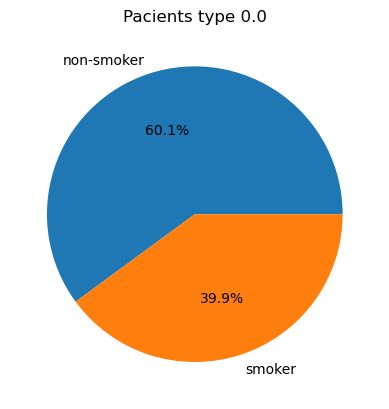

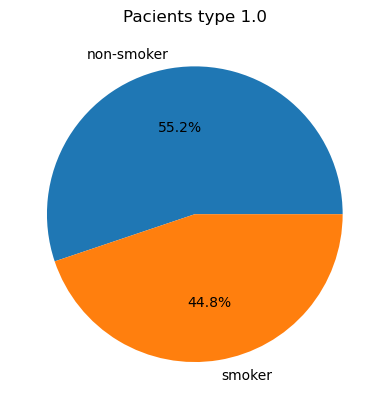

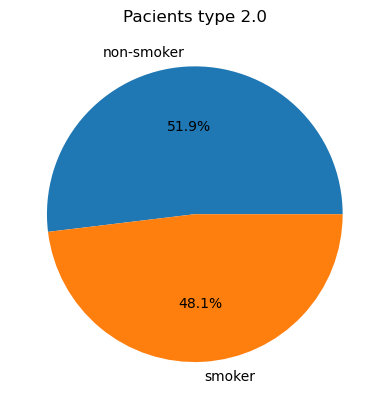

In [58]:
for a,b in smoker_feature.groupby('diabetes_status'):    
    plt.pie(b.precent_per_group, labels = ['non-smoker', 'smoker'], autopct='%1.1f%%')
    plt.title(f"Pacients type {a}")
    plt.show()

##### The conclusion we can make is that precent of pacients with high Blood Preasure with diebetes or are pre-diabetes is much higer than with lower Blood Preasure. 
The precent of low Blood Preasure in pacients which are negative is much hiher than the precent with high BP.
The difference in the smokers precent in people which are with diagnose diabetes or pre-diabetes is unsignifficant, which means this feature is not neccessery to use it for prediction. 

In [59]:
gender_data = diabets_health_indicators.groupby(['diabetes_status', 'sex']).sex.value_counts().reset_index()

In [60]:
gender_data.groupby('sex').mean()

diabetes_status         count
sex                               
f                1.0  41143.666667
m                1.0  37649.000000

In [61]:
diabets_health_indicators.groupby(['sex']).sex.value_counts()

sex
f    123431
m    112947
Name: count, dtype: int64

#### There is no so interested connection in different gender. This feature cannot be used to make good prediction for diabetes disease.

In [62]:
for column_data in diabets_prediabetes.columns:
    print(diabets_prediabetes.groupby(column_data)[column_data].value_counts())

diabetes_status
2.0    33568
Name: count, dtype: int64
high_bp
0     8921
1    24647
Name: count, dtype: int64
high_chol
0.0    12100
1.0    21468
Name: count, dtype: int64
chol_check
0      167
1    33401
Name: count, dtype: int64
bmi
13.0     3
14.0     7
15.0     9
16.0    30
17.0    49
        ..
86.0     1
87.0     3
91.0     1
94.0     1
99.0     2
Name: count, Length: 76, dtype: int64
smoker
0.0    17424
1.0    16144
Name: count, dtype: int64
stroke
0.0    30642
1.0     2926
Name: count, dtype: int64
heart_diseaseor_attack
0.0    26595
1.0     6973
Name: count, dtype: int64
phys_activity
0    12474
1    21094
Name: count, dtype: int64
fruits
0    13862
1    19706
Name: count, dtype: int64
veggies
0     7216
1    26352
Name: count, dtype: int64
hvy_alcohol_consump
0    32622
1      946
Name: count, dtype: int64
any_healthcare
0      823
1    32745
Name: count, dtype: int64
no_docbc_cost
0.0    31160
1.0     2408
Name: count, dtype: int64
gen_hlth
1.0     1309
2.0     6749
3.0    

In [63]:
diabets_health_indicators[['gen_hlth', 'ment_hlth',	'phys_hlth', 'diff_walk', "age"]]	

gen_hlth  ment_hlth  phys_hlth  diff_walk  age
0            5.0       10.0       20.0        0.0   11
1            2.0        0.0        0.0        0.0   11
2            2.0       10.0        0.0        0.0    9
3            5.0        0.0       30.0        1.0   12
4            3.0        0.0        0.0        1.0   13
...          ...        ...        ...        ...  ...
236373       4.0        0.0        0.0        0.0   10
236374       2.0       20.0        0.0        0.0    3
236375       2.0        0.0        0.0        0.0    7
236376       2.0        0.0        0.0        0.0   10
236377       1.0        2.0        2.0        0.0    6

[236378 rows x 5 columns]

In [64]:
diabets_health_indicators.gen_hlth.value_counts().unique

<bound method Series.unique of gen_hlth
2.0    85202
3.0    73088
1.0    41475
4.0    27821
5.0     8792
Name: count, dtype: int64>

In [65]:
gen_hlth_feature = diabets_health_indicators.groupby('diabetes_status').gen_hlth.value_counts().reset_index()
gen_hlth_feature

diabetes_status  gen_hlth  count
0               0.0       2.0  76833
1               0.0       3.0  57612
2               0.0       1.0  39730
3               0.0       4.0  17918
4               0.0       5.0   5098
5               1.0       3.0   2200
6               1.0       2.0   1620
7               1.0       4.0   1049
8               1.0       1.0    436
9               1.0       5.0    314
10              2.0       3.0  13276
11              2.0       4.0   8854
12              2.0       2.0   6749
13              2.0       5.0   3380
14              2.0       1.0   1309

Diabet group: 0.0
Mean values: diabetes_status        0.0
gen_hlth               3.0
count              39438.2
dtype: float64


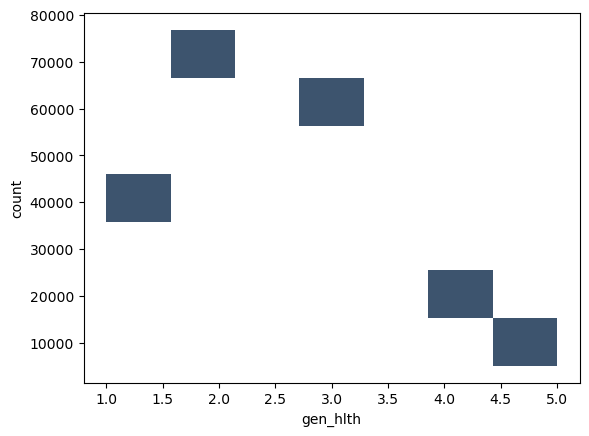

Diabet group: 1.0
Mean values: diabetes_status       1.0
gen_hlth              3.0
count              1123.8
dtype: float64


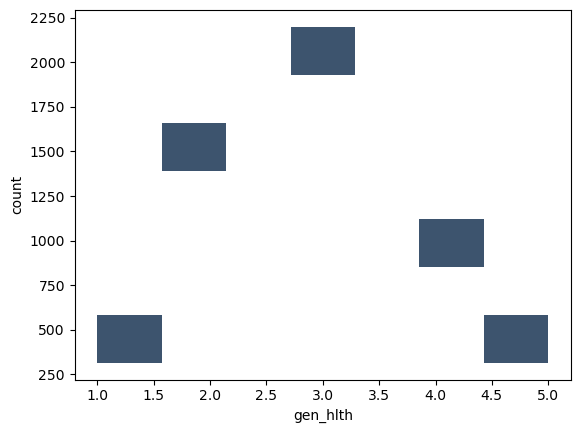

Diabet group: 2.0
Mean values: diabetes_status       2.0
gen_hlth              3.0
count              6713.6
dtype: float64


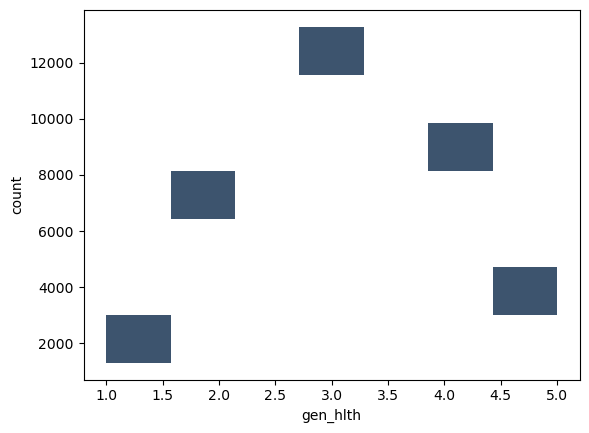

In [66]:
for group_item, data_grouped in gen_hlth_feature.groupby("diabetes_status"):
    print(f"Diabet group: {group_item}")
    print(f"Mean values: {data_grouped.mean()}")
    sns.histplot(data_grouped, x="gen_hlth", y = "count",  legend  = True, bins = 7)
    plt.show()

#### Mean value of general health is 3 for pre-diabetes and aggregation. 

In [67]:
diabet_status_per_phys_hlth = diabets_health_indicators.groupby("diabetes_status").phys_hlth.value_counts().sort_values(ascending = False).reset_index()

In [68]:
diabet_status_per_phys_hlth = diabet_status_per_phys_hlth.pivot_table(index = ["phys_hlth"], columns = "diabetes_status", values = "count").reset_index()

In [69]:
diabet_status_per_phys_hlth.rename(columns = {0.0: 'no_diabet', 1.0: 'diabetes', 2.0: 'pre_diabetes'}, inplace=True)

In [70]:
diabet_status_per_phys_hlth.columns

Index(['phys_hlth', 'no_diabet', 'diabetes', 'pre_diabetes'], dtype='object', name='diabetes_status')

In [71]:
diabet_status_per_phys_hlth['no_diabet'] = diabet_status_per_phys_hlth['no_diabet'].apply(lambda x:(x- diabet_status_per_phys_hlth.no_diabet.min())/(diabet_status_per_phys_hlth.no_diabet.max() - diabet_status_per_phys_hlth.no_diabet.min()))

In [72]:
diabet_status_per_phys_hlth['diabetes'] = diabet_status_per_phys_hlth['diabetes'].apply(lambda x:(x- diabet_status_per_phys_hlth.diabetes.min())/(diabet_status_per_phys_hlth.diabetes.max() - diabet_status_per_phys_hlth.diabetes.min()))

In [73]:
diabet_status_per_phys_hlth['pre_diabetes'] = diabet_status_per_phys_hlth['pre_diabetes'].apply(lambda x:(x- diabet_status_per_phys_hlth.pre_diabetes.min())/(diabet_status_per_phys_hlth.pre_diabetes.max() - diabet_status_per_phys_hlth.pre_diabetes.min()))

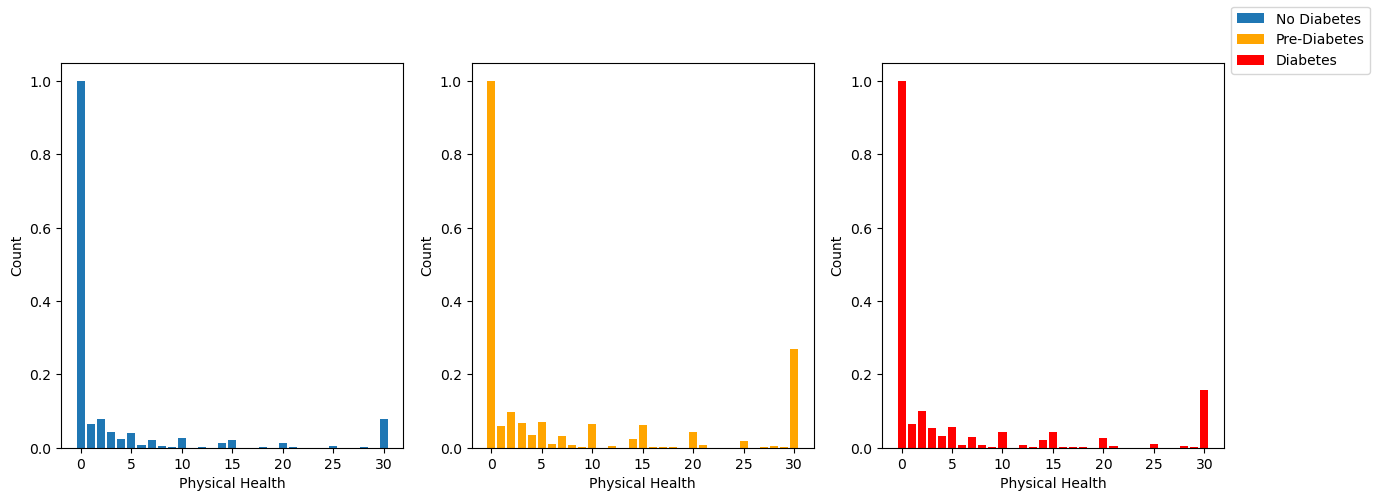

In [74]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))

ax[0].bar(diabet_status_per_phys_hlth.phys_hlth, diabet_status_per_phys_hlth.no_diabet, label = "No Diabetes")
ax[1].bar(diabet_status_per_phys_hlth.phys_hlth, diabet_status_per_phys_hlth.pre_diabetes, label = "Pre-Diabetes", color = "orange")
ax[2].bar(diabet_status_per_phys_hlth.phys_hlth, diabet_status_per_phys_hlth.diabetes, label = "Diabetes" , color = "red")

ax[0].set_xlabel("Physical Health")
ax[0].set_ylabel("Count")
ax[1].set_xlabel("Physical Health")
ax[1].set_ylabel("Count")
ax[2].set_xlabel("Physical Health")
ax[2].set_ylabel("Count")

fig.legend()
plt.show()

#### The 3 groups have similar distribution. In Pre-diabetes, people with illnes of 30 days are much more than the people with no diabetes.

In [75]:
diabetes_status_per_ment_hlth = diabets_health_indicators.groupby("diabetes_status").ment_hlth.value_counts().sort_values(ascending = False).reset_index()

In [76]:
diabetes_status_per_ment_hlth

diabetes_status  ment_hlth   count
0               0.0        0.0  122696
1               2.0        0.0   21227
2               0.0        2.0   11586
3               0.0        5.0    9608
4               0.0       30.0    9427
..              ...        ...     ...
87              1.0       22.0       2
88              1.0       16.0       2
89              1.0       19.0       1
90              1.0       26.0       1
91              1.0        9.0       1

[92 rows x 3 columns]

In [77]:
diabetes_status_per_ment_hlth = diabetes_status_per_ment_hlth.pivot_table(index = "ment_hlth", columns="diabetes_status", values = "count").reset_index()

In [78]:
diabetes_status_per_ment_hlth.rename(columns = {0.0: 'no_diabet', 1.0: 'diabetes', 2.0: 'pre_diabetes'}, inplace=True)

In [79]:
def plot_different_types_pacients_per_feature(x ,y):
    fig, ax = plt.subplots(1, 3, figsize = (15,7))
    
    ax[0].bar(x, y[0], label = "No Diabetes")
    ax[1].bar(x, y[1], label = "Pre-Diabetes", color = "orange")
    ax[2].bar(x, y[2], label = "Diabetes" , color = "red")
    
    ax[0].set_xlabel("Menthal Health")
    ax[0].set_ylabel("Count")
    ax[1].set_xlabel("Menthal Health")
    ax[1].set_ylabel("Count")
    ax[2].set_xlabel("Menthal Health")
    ax[2].set_ylabel("Count")
    
    fig.legend()
    
    plt.show()

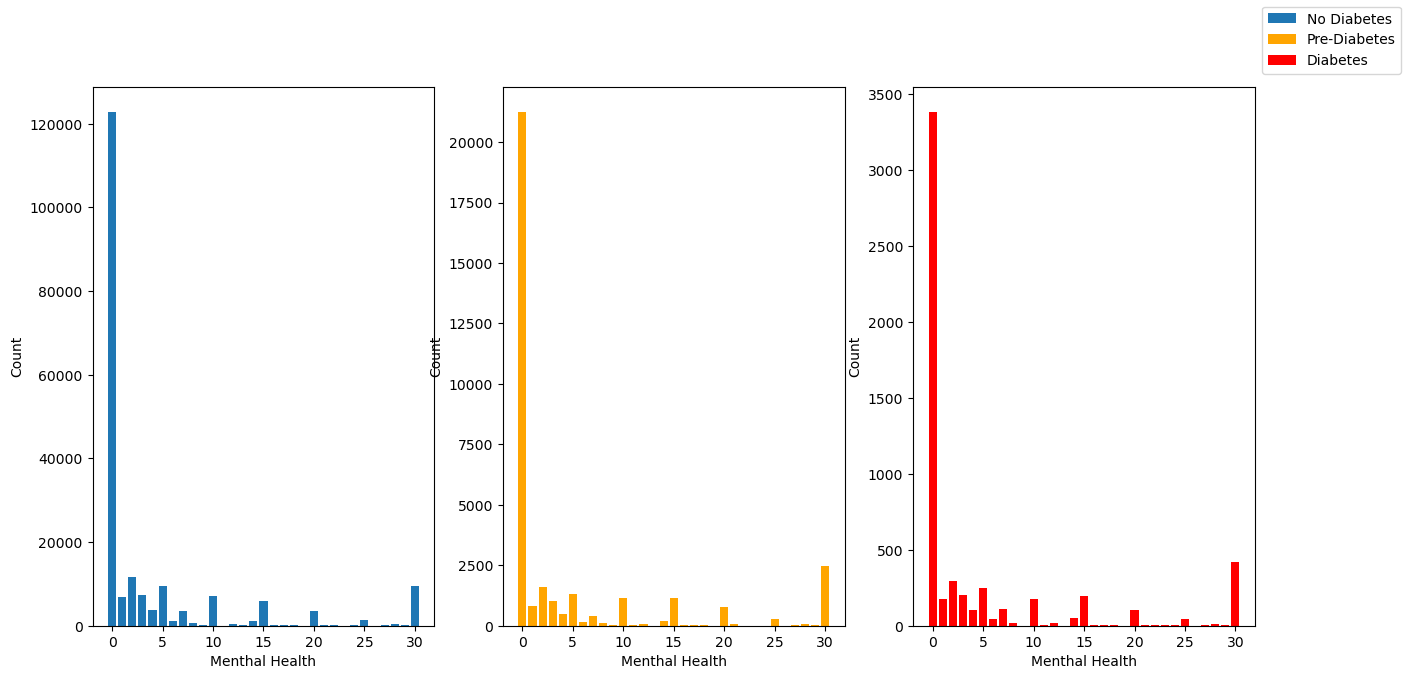

In [80]:
plot_different_types_pacients_per_feature(diabetes_status_per_ment_hlth.ment_hlth, [diabetes_status_per_ment_hlth.no_diabet, diabetes_status_per_ment_hlth.pre_diabetes, diabetes_status_per_ment_hlth.diabetes])

#### Menthal health has similar distribution. Most of the people doesn't have problems with menthal health.

In [81]:
diabetes_negative.groupby("age").age.value_counts().unique

<bound method Series.unique of age
1      6608
2      8596
3     11998
4     14608
5     15953
6     15681
7     18095
8     19398
9     21457
10    21663
11    18940
12    11973
13    12221
Name: count, dtype: int64>

In [82]:
age_distribution_diabetes = diabets_health_indicators.groupby('diabetes_status').age.value_counts().reset_index()

In [83]:
age_distribution_diabetes = age_distribution_diabetes.pivot_table(index='age', columns='diabetes_status', values = 'count')

In [84]:
age_distribution_diabetes.rename(columns= {0.0:'non_diabetes', 1.0:'diabetes', 2.0:'pre_diabetes' }, inplace=True)

In [85]:
age_distribution_diabetes.columns

Index(['non_diabetes', 'diabetes', 'pre_diabetes'], dtype='object', name='diabetes_status')

In [86]:
age_distribution_diabetes['non_diabetes'] = age_distribution_diabetes['non_diabetes'].apply(lambda x: (x - age_distribution_diabetes['non_diabetes'].min())/(age_distribution_diabetes['non_diabetes'].max() - age_distribution_diabetes['non_diabetes'].min()))

In [87]:
age_distribution_diabetes['diabetes'] = age_distribution_diabetes['diabetes'].apply(lambda x: (x - age_distribution_diabetes['diabetes'].min())/(age_distribution_diabetes['diabetes'].max() - age_distribution_diabetes['diabetes'].min()))


In [88]:
age_distribution_diabetes['pre_diabetes'] = age_distribution_diabetes['pre_diabetes'].apply(lambda x: (x - age_distribution_diabetes['pre_diabetes'].min())/(age_distribution_diabetes['pre_diabetes'].max() - age_distribution_diabetes['pre_diabetes'].min()))

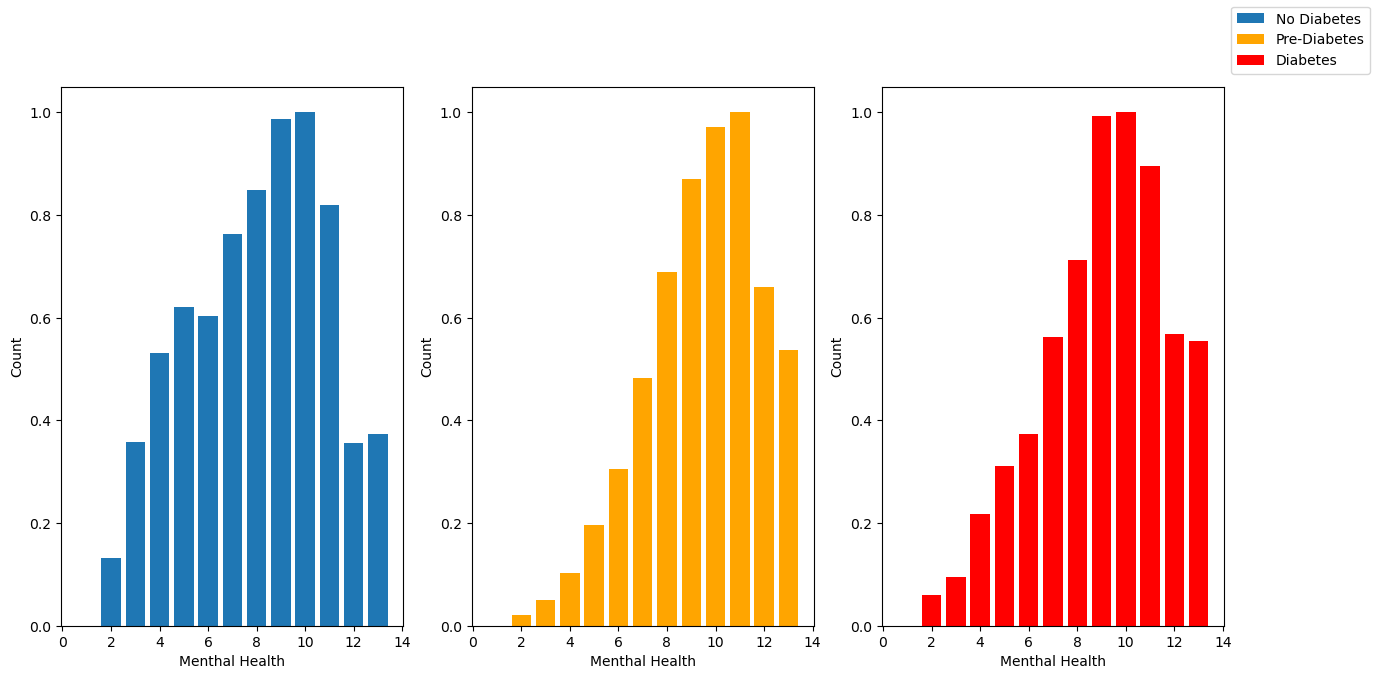

In [89]:
plot_different_types_pacients_per_feature(age_distribution_diabetes.index, [age_distribution_diabetes.non_diabetes, age_distribution_diabetes.pre_diabetes,age_distribution_diabetes .diabetes])

In [90]:
age_distribution_diabetes

diabetes_status  non_diabetes  diabetes  pre_diabetes
age                                                  
1                    0.000000  0.000000      0.000000
2                    0.132049  0.059133      0.020219
3                    0.358021  0.094612      0.049362
4                    0.531385  0.216820      0.101821
5                    0.620724  0.311432      0.195628
6                    0.602657  0.373193      0.304372
7                    0.763002  0.562418      0.482149
8                    0.849552  0.712221      0.688342
9                    0.986317  0.992116      0.871038
10                   1.000000  1.000000      0.971949
11                   0.819130  0.896189      1.000000
12                   0.356360  0.568988      0.659563
13                   0.372833  0.554534      0.537887

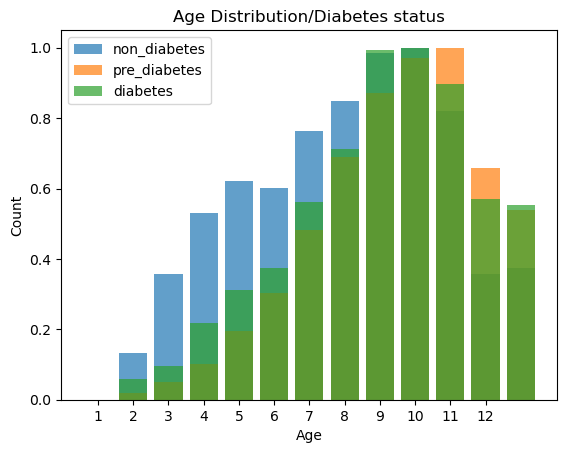

In [91]:
plt.bar(age_distribution_diabetes.index, age_distribution_diabetes.non_diabetes,label = 'non_diabetes', alpha = 0.7) # label=["non_diabetes","diabetes", "pre_diabetes"]
plt.bar(age_distribution_diabetes.index, age_distribution_diabetes.pre_diabetes,label = 'pre_diabetes', alpha = 0.7)
plt.bar(age_distribution_diabetes.index, age_distribution_diabetes.diabetes,label = 'diabetes', alpha = 0.7)

plt.xticks(range(1, age_distribution_diabetes.index.max()))

plt.xlabel("Age")
plt.ylabel("Count")

plt.title("Age Distribution/Diabetes status")
plt.legend()
plt.show()

#### Pre diabetes status starting to rise over 50 years old and the maximum is between 60-80 years old. 

In [99]:
diff_walk_per_diabet_status = diabets_health_indicators.groupby("diabetes_status").diff_walk.value_counts().reset_index()

In [104]:
total_diff_walk_per_group = diff_walk_per_diabet_status.groupby("diabetes_status")['count'].transform('sum')

In [106]:
diff_walk_per_diabet_status['precent_diff_walk'] = diff_walk_per_diabet_status['count']/total_diff_walk_per_group * 100

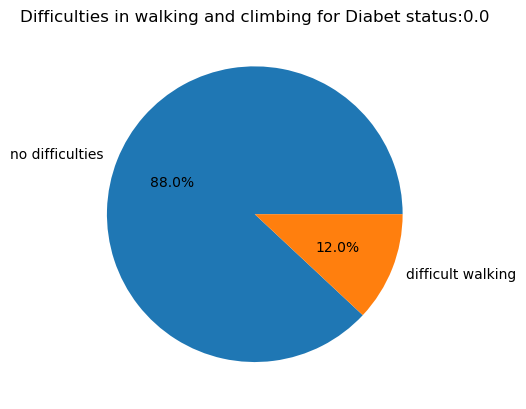

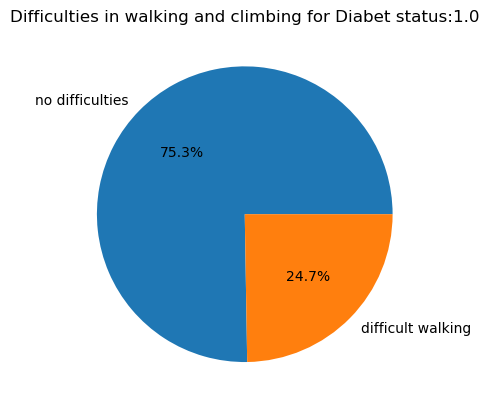

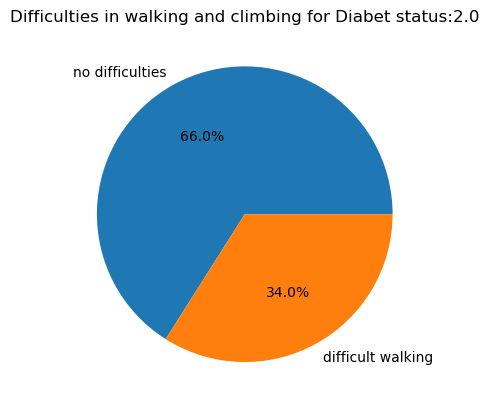

In [114]:
for item, group_data in diff_walk_per_diabet_status.groupby('diabetes_status'):
    plt.pie(group_data.precent_diff_walk,labels = ['no difficulties', 'difficult walking'], autopct='%1.1f%%')
    plt.title(f"Difficulties in walking and climbing for Diabet status:{item}")
    plt.show()

In [92]:
# https://data.world/informatics-edu/diabetes-prediction

#### This dataset is about diabetes that is a lifelong condition that causes a person's blood sugar level to become too high [NHS].

There are 2 main types of diabetes:

    type 1 diabetes – where the body's immune system attacks and destroys the cells that produce insulin
    type 2 diabetes – where the body does not produce enough insulin or the body's cells do not react to insulin

Type 2 diabetes is far more common than type 1. In the UK, around 90% of all adults with diabetes have type 2.

The key figures about diabetes are [IDF]:

    1 in 11 adults (20-79 years) have diabetes (463 million people).
    1 in 2 adults with diabetes are undiagnosed (232 million people).
    1 in 5 people with diabetes are above 65 years old (136 million people).
    10% of global health expenditure is spent on diabetes (USD760 billion).
    1 in 6 live births (20 million) is affected by hyperglycemia in pregnancy, 84% of which have gestational diabetes.
    3 in 4 (79%) of people with diabetes live in low- and middle-income countries.
    Over 1.1 million children and adolescents below 20 yeas have type 1 diabetes.
    1 in 13 adults (20-79 years) have impaired glucose tolerance (374 million people).
    2 in 3 people with diabetes live in urban areas (310.3 million).

Content

Original data came from the Biostatistics program at Vanderbilt. This dataset was downloaded from data.world.

The downloaded dataset contains 390 instances (patients) including 60 instances are diabetes and the remaining 330 are not diabetes.

Any patient without a Hemoglobin A1c was excluded. If their Hemoglobin A1c was 6.5 or greater they were labeled with diabetes = 1. The downloaded dataset contains Glucose but it was deleted from this dataset because it is strongly related to diabetes.



    id - Identifies patients by number
    Cholesterol - Total cholesterol
    stab.glu - glucose, Fasting blood sugar
    HDL - HDL or good cholesterol
    Ratio Chol/HDL - Ratio of total cholesterol to good cholesterol. The desirable result is < 5
    glyhb  - Glycosolated hemoglobin ratio > 7.0 is usually taken as a positive diagnosis of diabetes
    Location -location
    Age - All adult African Americans
    Gender - female/male
    Height - In inches
    Weight 1 - In pounds (lbs)
    wigth 2
    BMI - 703 x weight (lbs)/ [height (inches)]^2
    bp.1s Systolic BP - The upper number of blood pressure
    bp.1d Diastolic BP - The lower number of blood pressure
    Waist - Measured in inches
    Hip - Measured in inches
    Waist/hip - Ratio is possibly a stronger risk factor for heart disease than BMI
    time.ppn - Postprandial Time when Labs were Drawn in minutes


In [93]:
diabetes_registry = pd.read_csv("data_classification/Diabetes Registry.CSV - Introduction to Biomedical Data Science.csv")
diabetes_registry.describe().T

count          mean           std      min      25%       50%  \
id        390.0  16003.761538  11828.808130  1000.00  4792.25  15769.50   
chol      389.0    207.275064     44.714950    78.00   179.00    203.00   
stab.glu  390.0    107.338462     53.798188    48.00    81.00     90.00   
hdl       389.0     50.267352     17.301317    12.00    38.00     46.00   
ratio     389.0      4.526478      1.738480     1.50     3.20      4.20   
glyhb     390.0      5.589769      2.242595     2.68     4.38      4.84   
Age       390.0     46.774359     16.435911    19.00    34.00     44.50   
Height    387.0     65.979328      3.926737    52.00    63.00     66.00   
Weight 1  390.0    177.348718     40.391547    99.00   150.25    173.00   
Weight 2  390.0    175.056410     38.437034   105.00   149.00    170.00   
bp.1s     385.0    137.148052     22.997427    90.00   121.00    136.00   
bp.1d     385.0     83.285714     13.582366    48.00    75.00     82.00   
bp.2s     138.0    152.840580     21.709847   110.00   138.25    150.00   
bp.2d     138.0     92.731884     11.576808    60.00    84.00     92.00   
waist     388.0     37.896907      5.762724    26.00    33.00     37.00   
hip       388.0     43.033505      5.649213    30.00    39.00     42.00   
time.ppn  387.0    336.124031    308.904281     5.00    90.00    240.00   

               75%           max  
id        20334.25  41752.000000  
chol        229.00    443.000000  
stab.glu    107.75    385.000000  
hdl          59.00    120.000000  
ratio         5.40     19.299999  
glyhb         5.60     16.110001  
Age          60.00     92.000000  
Height       69.00     76.000000  
Weight 1    199.75    325.000000  
Weight 2    194.00    319.000000  
bp.1s       148.00    250.000000  
bp.1d        90.00    124.000000  
bp.2s       161.75    238.000000  
bp.2d       100.00    124.000000  
waist        41.00     56.000000  
hip          46.00     64.000000  
time.ppn    480.00   1560.000000

In [94]:
diabetes_registry.columns

Index(['id', 'chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'Location', 'Age',
       'Gender', 'Height', 'Weight 1', 'Weight 2', 'frame', 'bp.1s', 'bp.1d',
       'bp.2s', 'bp.2d', 'waist', 'hip', 'time.ppn'],
      dtype='object')

In [95]:
diabetes_registry.shape

(390, 20)

In [96]:
diabetes_registry.head(5)

id   chol  stab.glu   hdl  ratio  glyhb    Location  Age  Gender  Height  \
0  1000  203.0        82  56.0    3.6   4.31  Buckingham   46  female    62.0   
1  1001  165.0        97  24.0    6.9   4.44  Buckingham   29  female    64.0   
2  1002  228.0        92  37.0    6.2   4.64  Buckingham   58  female    61.0   
3  1003   78.0        93  12.0    6.5   4.63  Buckingham   67    male    67.0   
4  1005  249.0        90  28.0    8.9   7.72  Buckingham   64    male    68.0   

   Weight 1  Weight 2   frame  bp.1s  bp.1d  bp.2s  bp.2d  waist   hip  \
0       121       119  medium  118.0   59.0    NaN    NaN   29.0  38.0   
1       218       218   large  112.0   68.0    NaN    NaN   46.0  48.0   
2       256       243   large  190.0   92.0  185.0   92.0   49.0  57.0   
3       119       121   large  110.0   50.0    NaN    NaN   33.0  38.0   
4       183       179  medium  138.0   80.0    NaN    NaN   44.0  41.0   

   time.ppn  
0     720.0  
1     360.0  
2     180.0  
3     480.0  
4     300.0